# Read Sepsis Mimic data
This is data from Patrick Rockenschaub and is right now data from MIMIC 3 which has been used to predict sepsis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!cp '/content/gdrive/MyDrive/Fraunhofer/Copy of mimic_sepsis.zip' '/content/'
!mv '/content/Copy of mimic_sepsis.zip' 'mimic_sepsis.zip'
!unzip mimic_sepsis.zip
df_loaded = False

Mounted at /content/gdrive
Archive:  mimic_sepsis.zip
  inflating: mimic_sepsis.csv        


In [3]:
# Load data from *.csv file if necessary
if df_loaded != True:
    df = pd.read_csv('mimic_sepsis.csv')
    df_loaded = True

print(f"Column names: ({len(df.columns)} total)\n" + 8 * 15 *"=", end="")
for i, item in enumerate(list(df.columns)):
    if i % 8 == 0: print("")
    print(f"{item:11}\t", end="")

print("\n" + 8 * 15 * "=")
print("Row: 2000")
print(df.loc[2000,:])

Column names: (185 total)
stay_id    	time       	sepsis     	hr         	o2sat      	temp       	sbp        	map        	
dbp        	resp       	alb        	alp        	alt        	ast        	basos      	be         	
bicar      	bili       	bili_dir   	bnd        	bun        	ca         	cai        	ck         	
ckmb       	cl         	crea       	crp        	eos        	esr        	etco2      	fgn        	
fio2       	glu        	hbco       	hct        	hgb        	inr_pt     	k          	lact       	
lymph      	mch        	mchc       	mcv        	methb      	mg         	na         	neut       	
pco2       	ph         	phos       	plt        	po2        	pt         	ptt        	rbc        	
rdw        	tco2       	tnt        	tri        	urine      	wbc        	mews       	news       	
qsofa      	rass       	sirs       	hr_miss    	o2sat_miss 	temp_miss  	sbp_miss   	map_miss   	
dbp_miss   	resp_miss  	alb_miss   	alp_miss   	alt_miss   	ast_miss   	basos_miss 	be_miss    	
bica

In [4]:
#print(df)
print("Unique stay_id: ", df['stay_id'].nunique(), "  # number of treatments")




Unique stay_id:  39262   # number of treatments


# Statistical calculations

Here we do some caluclations of the data. 

In [94]:
# Checking patient_id vs. days in hospital
vc = df['stay_id'].value_counts(ascending=True)
histogram = dict()
for line in vc:
    histogram[line] = histogram.get(line, 0) + 1
hours, num_patients = list(histogram.keys()), list(histogram.values())
mean = np.mean(num_patients)
median = np.median(num_patients)
mean_hours = np.array(num_patients) @ np.array(hours) / np.sum(hours)

120.17941176470588

In [6]:
# Calculating the Nans
class NAN:
    text = "Holding NAN calculation stuff"
nan = NAN()
nan.columns = dict(df.isna().sum(axis=0))

In [77]:
df.loc[100000,:]

stay_id      204468.0
time            136.0
sepsis            0.0
hr               46.0
o2sat           100.0
               ...   
tco2_cnt          1.0
tnt_cnt           0.0
tri_cnt           0.0
urine_cnt         1.0
wbc_cnt           1.0
Name: 100000, Length: 185, dtype: float64

Data points for stay_id 200081 = 74
Data points for stay_id 204468 = 189


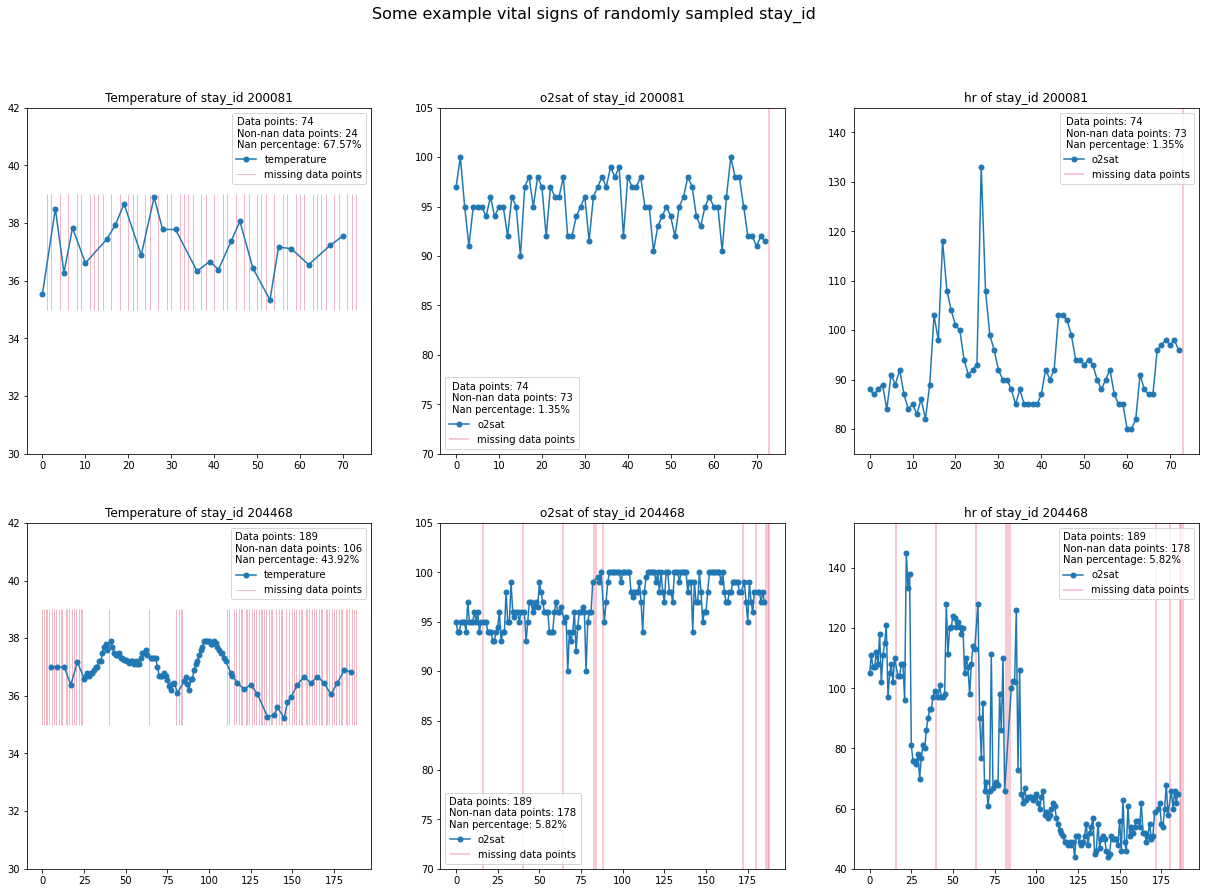

In [92]:
# Calculating the average temperature(s)
# - First some exemplatory temperatures for a few patients
stay_id = 200081
temp = df.loc[df['stay_id'] == stay_id].sort_values(by=['time'])
print(f"Data points for stay_id {stay_id} = {len(list(temp['time']))}")

mask_temp = np.isfinite(np.array(temp['temp']))
mask_o2sat = np.isfinite(np.array(temp['o2sat']))
mask_hr = np.isfinite(np.array(temp['hr']))

rows, columns = 2, 3
fig = plt.figure(figsize=(columns * 7, rows * 7))
plt.suptitle("Some example vital signs of randomly sampled stay_id", fontsize=16)
grid = plt.GridSpec(rows, columns, figure=fig)

# 1) temperature
mask = mask_temp
ax = plt.subplot(grid[0,0])
ax.set_title(f"Temperature of stay_id {stay_id}")
ax.plot(temp.loc[mask, 'time'], temp.loc[mask, 'temp'], ms="5", marker="o", label="temperature")
ax.set_ylim(30,42)
ax.vlines(temp.loc[np.invert(mask), 'time'], 35, 39, color="crimson", alpha=0.3, label="missing data points", lw=1)
ax.legend(title=f"Data points: {len(temp['time'])}\nNon-nan data points: {np.sum(mask)}\nNan percentage: {np.sum(np.invert(mask))/len(temp['time']):.2%}")

# 2) o2sat
mask = mask_o2sat
ax = plt.subplot(grid[0,1])
ax.set_title(f"o2sat of stay_id {stay_id}")
ax.plot(temp.loc[mask, 'time'], temp.loc[mask, 'o2sat'], ms="5", marker="o", label="o2sat")
ax.set_ylim(70,105)
ax.vlines(temp.loc[np.invert(mask), 'time'], 70, 105, color="crimson", alpha=0.3, label="missing data points")
ax.legend(title=f"Data points: {len(temp['time'])}\nNon-nan data points: {np.sum(mask)}\nNan percentage: {np.sum(np.invert(mask))/len(temp['time']):.2%}")

# 3) hr
ask = mask_hr
ax = plt.subplot(grid[0,2])
ax.set_title(f"hr of stay_id {stay_id}")
ax.plot(temp.loc[mask, 'time'], temp.loc[mask, 'hr'], ms="5", marker="o", label="o2sat")
ax.set_ylim(75,145)
ax.vlines(temp.loc[np.invert(mask), 'time'], 70, 155, color="crimson", alpha=0.3, label="missing data points")
ax.legend(title=f"Data points: {len(temp['time'])}\nNon-nan data points: {np.sum(mask)}\nNan percentage: {np.sum(np.invert(mask))/len(temp['time']):.2%}")


# another stay_id
stay_id = 204468
temp = df.loc[df['stay_id'] == stay_id].sort_values(by=['time'])
print(f"Data points for stay_id {stay_id} = {len(list(temp['time']))}")
mask_temp = np.isfinite(np.array(temp['temp']))
mask_o2sat = np.isfinite(np.array(temp['o2sat']))
mask_hr = np.isfinite(np.array(temp['hr']))

# 1) temperature
mask = mask_temp
ax = plt.subplot(grid[1,0])
ax.set_title(f"Temperature of stay_id {stay_id}")
ax.plot(temp.loc[mask, 'time'], temp.loc[mask, 'temp'], ms="5", marker="o", label="temperature")
ax.set_ylim(30,42)
ax.vlines(temp.loc[np.invert(mask), 'time'], 35, 39, color="crimson", alpha=0.3, label="missing data points", lw=1)
ax.legend(title=f"Data points: {len(temp['time'])}\nNon-nan data points: {np.sum(mask)}\nNan percentage: {np.sum(np.invert(mask))/len(temp['time']):.2%}")

# 2) o2sat
mask = mask_o2sat
ax = plt.subplot(grid[1,1])
ax.set_title(f"o2sat of stay_id {stay_id}")
ax.plot(temp.loc[mask, 'time'], temp.loc[mask, 'o2sat'], ms="5", marker="o", label="o2sat")
ax.set_ylim(70,105)
ax.vlines(temp.loc[np.invert(mask), 'time'], 70, 105, color="crimson", alpha=0.3, label="missing data points")
ax.legend(title=f"Data points: {len(temp['time'])}\nNon-nan data points: {np.sum(mask)}\nNan percentage: {np.sum(np.invert(mask))/len(temp['time']):.2%}")

# 3) hr
mask = mask_hr
ax = plt.subplot(grid[1,2])
ax.set_title(f"hr of stay_id {stay_id}")
ax.plot(temp.loc[mask, 'time'], temp.loc[mask, 'hr'], ms="5", marker="o", label="o2sat")
ax.set_ylim(40,155)
ax.vlines(temp.loc[np.invert(mask), 'time'], 35, 155, color="crimson", alpha=0.3, label="missing data points")
ax.legend(title=f"Data points: {len(temp['time'])}\nNon-nan data points: {np.sum(mask)}\nNan percentage: {np.sum(np.invert(mask))/len(temp['time']):.2%}")

## Creating the plot

After having done our calculations we are ready to plot them.

(0.0, 1.0)

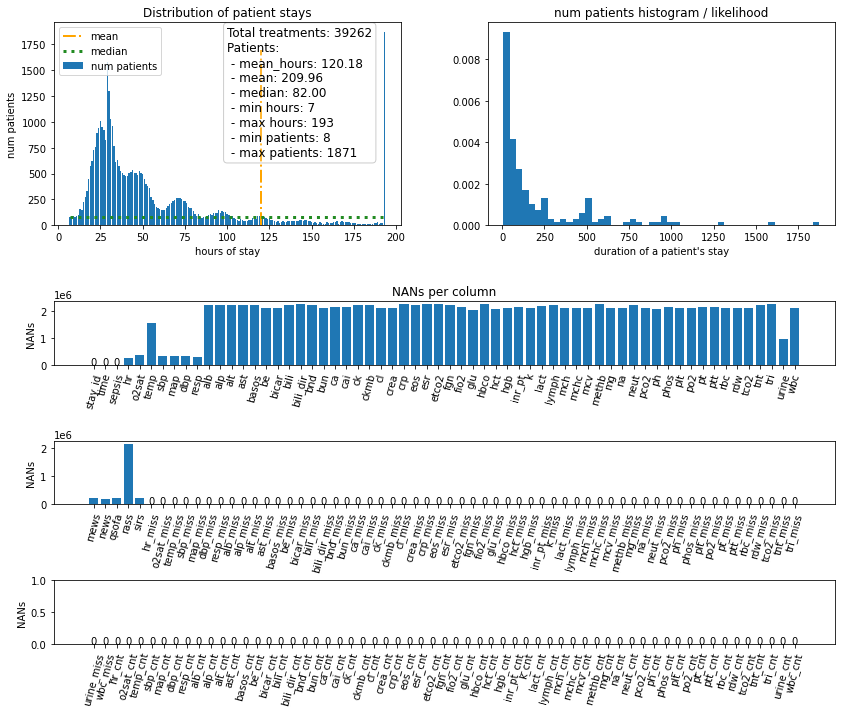

In [96]:
fig = plt.figure(figsize=(14,14))
rows, columns = 6, 2
grid = plt.GridSpec(rows, columns, wspace=.25, hspace=1.2, figure=fig)

# -----------------------------------------------------------------------------
# Distribution of patient stays
ax = plt.subplot(grid[0:2,0])
ax.set_title("Distribution of patient stays")
ax.set(xlabel="hours of stay", ylabel="num patients")
ax.bar(hours, num_patients, label="num patients")
ax.vlines(x=mean_hours  , ymin=0, ymax=1700, colors='orange', linestyles='-.', lw=2, label='mean')
ax.hlines(y=median, xmin=min(hours), xmax=max(hours), colors='forestgreen', linestyles=':', lw=3, label='median')
ax.legend(loc="upper left")
# add textbox
textstr = f"Total treatments: {np.sum(num_patients)}\nPatients:   \n - mean_hours: {mean_hours:.2f}\n - mean: {mean:.2f}\n - median: {median:.2f}\n - min hours: {min(hours)}\n - max hours: {max(hours)}\n - min patients: {min(num_patients)}\n - max patients: {max(num_patients)}"
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
ax.text(0.50, 0.98, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# -----------------------------------------------------------------------------
# Histogram num_patients
ax = plt.subplot(grid[0:2,1])
ax.set_title("num patients histogram / likelihood")
ax.hist(num_patients, 50, density=1)
ax.set(xlabel="duration of a patient's stay", ylabel="")

# -----------------------------------------------------------------------------
# NANs in labels (A)
def valuelabel(X,Y, ax):
    for i in range(len(X)):
        if Y[i] != 0:
            continue
        ax.text(i,Y[i], f"{Y[i]:}", ha = 'center')

def nan_plot(keys, values, ax):
    ax.bar(keys, values)
    ax.set(ylabel="NANs")
    ax.set_xticks(np.arange(len(keys)))
    _ = ax.set_xticklabels(keys, fontdict={'rotation':75, 'ha':'center'})
    valuelabel(keys, values, ax)
        
keys, values = list(nan.columns.keys())[:62], list(nan.columns.values())[:62]
ax = plt.subplot(grid[2,:])
ax.set_title("NANs per column")
nan_plot(keys, values, ax)
        
keys, values = list(nan.columns.keys())[62:124], list(nan.columns.values())[62:124]
ax = plt.subplot(grid[3,:])
nan_plot(keys, values, ax)

keys, values = list(nan.columns.keys())[124:], list(nan.columns.values())[124:]
ax = plt.subplot(grid[4,:])
nan_plot(keys, values, ax)
ax.set_ylim(0,1)

# Testing and temporary code

None of this code is necessary anymore. This is like a playground and temporary storage space.

In [122]:
type(nan_dict)
nan_dict = dict(nan_dict)

In [153]:
class D:
    d = 3

dd = D()
dd.f = 3


In [ ]:
days, num_patients = list(histogram.keys()), list(histogram.values())
mean = np.mean(num_patients)
median = np.median(num_patients)

print(f"Mean patients: {mean:.2f}\t Median patients: {median:.2f}")

fig, axs = plt.subplots(2,2, figsize=(15,14))


axs[0,0].set_title("Distribution of patient stays")
axs[0,0].set(xlabel="days of stay", ylabel="num patients")
axs[0,0].bar(days, num_patients, label="num patients")
axs[0,0].hlines(y=mean, xmin=min(days), xmax=max(days), colors='orange', linestyles='-.', lw=2, label='mean')
axs[0,0].hlines(y=median, xmin=min(days), xmax=max(days), colors='forestgreen', linestyles=':', lw=2, label='median')
axs[0,0].legend()
# add textbox
textstr = f"Patients per day:   \n - mean: {mean:.2f}\n - median: {median:.2f}"
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
axs[0,0].text(0.25, 1.85, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Histogram num_patients
axs[0,1].set_title("num patients histogram / likelihood")
axs[0,1].hist(num_patients, 50, density=1)
axs[0,1].set(xlabel="num patients for any given day", ylabel="")

# Histogram days
axs[1,0].set_title("num_patients histogram / likelihood")
axs[1,0].hist(days, 200, density=1)
axs[1,0].set(xlabel="num patients for any given day", ylabel="")
